In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data_path = "./expy-tky_202112.csv.gz"
feature_list = ['speed']

In [8]:
df = pd.read_csv(data_path)
df

,timestamp,linkid,speed
0,2021-12-01 00:00:00,83585420,73.0753
1,2021-12-01 00:00:00,83585485,55.9635
2,2021-12-01 00:00:00,83585609,65.5007
3,2021-12-01 00:00:00,83585658,56.3080
4,2021-12-01 00:00:00,83585806,61.6489
...,...,...,...
12682219,2021-12-31 23:50:00,117632419,35.4560
12682220,2021-12-31 23:50:00,118415091,52.7100
12682221,2021-12-31 23:50:00,118415100,56.9507
12682222,2021-12-31 23:50:00,118770411,84.3926


In [9]:
tmp = df[df.timestamp=='2021-12-02 00:00:00']
tmp

,timestamp,linkid,speed
409104,2021-12-02 00:00:00,83585420,73.0753
409105,2021-12-02 00:00:00,83585485,55.9635
409106,2021-12-02 00:00:00,83585609,65.5007
409107,2021-12-02 00:00:00,83585658,56.3080
409108,2021-12-02 00:00:00,83585806,66.5561
...,...,...,...
411940,2021-12-02 00:00:00,117632419,46.1243
411941,2021-12-02 00:00:00,118415091,61.6042
411942,2021-12-02 00:00:00,118415100,63.4571
411943,2021-12-02 00:00:00,118770411,82.2910


In [12]:
N_link = 2841
# N_link = 1843
data = df[feature_list].values
print(data.shape)
data = data.reshape(-1, N_link, data.shape[-1])
print(data.shape)

(12682224, 1)
(4464, 2841, 1)


In [15]:
for month in [10, 11, 12]:
    data_path = f"./expy-tky_2021{month}.csv.gz"
    feature_list = ['speed']
    df = pd.read_csv(data_path)
    N_link = 2841
    data = df[feature_list].values
    data = data.reshape(-1, N_link, data.shape[-1])
    print(data.shape)

(4464, 2841, 1)
(4320, 2841, 1)
(4464, 2841, 1)


In [16]:
4464+4320+4464

13248

In [17]:
4464 + 4464 + 4320

13248

In [18]:
np.array_equal(data[144, :, 0], tmp['speed'].values)

True

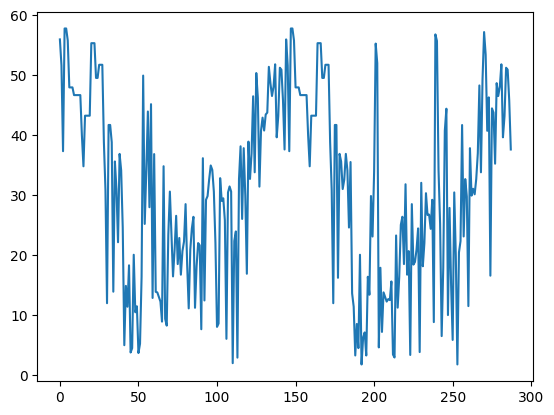

In [19]:
plt.plot(data[:144*2, 1, 0])

<Axes: >

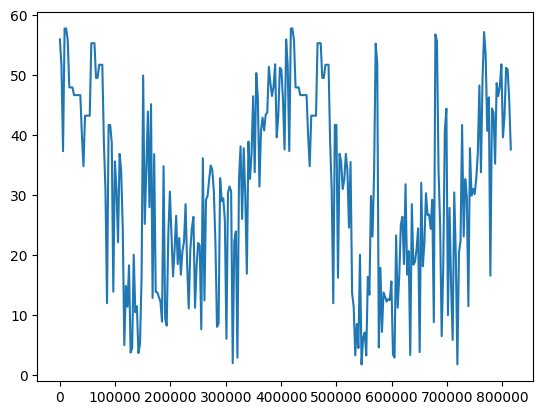

In [20]:
df[(df.timestamp<'2021-12-02 23:59:59') & (df.linkid==83585485)]['speed'].plot()